<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sample-data" data-toc-modified-id="Sample-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sample data</a></span></li><li><span><a href="#Exploration" data-toc-modified-id="Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploration</a></span><ul class="toc-item"><li><span><a href="#Single-plot" data-toc-modified-id="Single-plot-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Single plot</a></span></li><li><span><a href="#Using-subplots" data-toc-modified-id="Using-subplots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Using subplots</a></span></li><li><span><a href="#Indexed-first-plot" data-toc-modified-id="Indexed-first-plot-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Indexed first plot</a></span></li><li><span><a href="#use-fig,-ax1-4-convention" data-toc-modified-id="use-fig,-ax1-4-convention-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>use fig, ax1-4 convention</a></span></li><li><span><a href="#use-plt.subplot()-syntax" data-toc-modified-id="use-plt.subplot()-syntax-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>use plt.subplot() syntax</a></span></li></ul></li><li><span><a href="#Matplotlib-colour-cycles" data-toc-modified-id="Matplotlib-colour-cycles-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Matplotlib colour cycles</a></span></li></ul></div>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

# Sample data

In [5]:
def sample_data():
    df = pd.DataFrame([
    ['2021-01-01',400, 100, 0.6]
    , ['2021-01-02',200, 120, 0.4]
    , ['2021-01-03',300, 90, 0.3]
    , ['2021-01-04',320, 130, 0.32]

    ], columns= ['PERIOD', 'A', 'B', 'C'])
    df = df.set_index('PERIOD')
#     print(df)
    return df
    
sample_data()

<IPython.core.display.Javascript object>

,A,B,C
PERIOD,,,
2021-01-01,400,100,0.60
2021-01-02,200,120,0.40
2021-01-03,300,90,0.30
2021-01-04,320,130,0.32


# Exploration

**Resources**

- Tight layout: https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html
- Figsize: https://www.pythonpool.com/matplotlib-figsize/

## Single plot

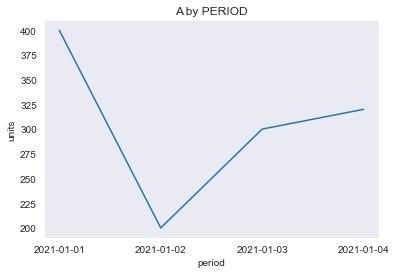

In [28]:
_ = plt.plot(df['A'])
_ = plt.title('A by PERIOD')
_ = plt.xlabel('period')
_ = plt.ylabel('units')
plt.show()

## Using subplots

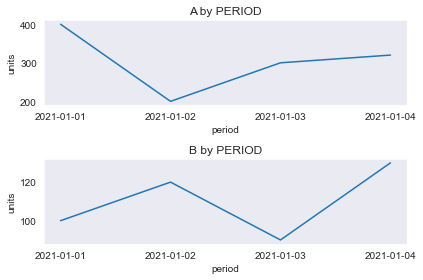

In [39]:
plt.subplot(2,1,1)
_ = plt.plot(df['A'])
_ = plt.title('A by PERIOD')
_ = plt.xlabel('period')
_ = plt.ylabel('units')

plt.subplot(2,1,2)
_ = plt.plot(df['B'])
_ = plt.title('B by PERIOD')
_ = plt.xlabel('period')
_ = plt.ylabel('units')

plt.tight_layout()
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()

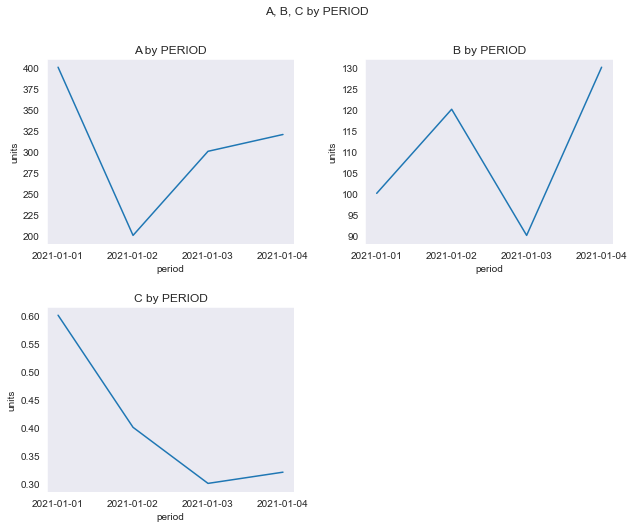

In [58]:
plt.figure(figsize = (10,8))

plt.subplot(2,2,1)
_ = plt.plot(df['A'])
_ = plt.title('A by PERIOD')
_ = plt.xlabel('period')
_ = plt.ylabel('units')

plt.subplot(2,2,2)
_ = plt.plot(df['B'])
_ = plt.title('B by PERIOD')
_ = plt.xlabel('period')
_ = plt.ylabel('units')

plt.subplot(2,2,3)
_ = plt.plot(df['C'])
_ = plt.title('C by PERIOD')
_ = plt.xlabel('period')
_ = plt.ylabel('units')

# plt.tight_layout()
plt.tight_layout(pad=5, w_pad=2, h_pad=2)
plt.suptitle('A, B, C by PERIOD')
plt.show()

## Indexed first plot

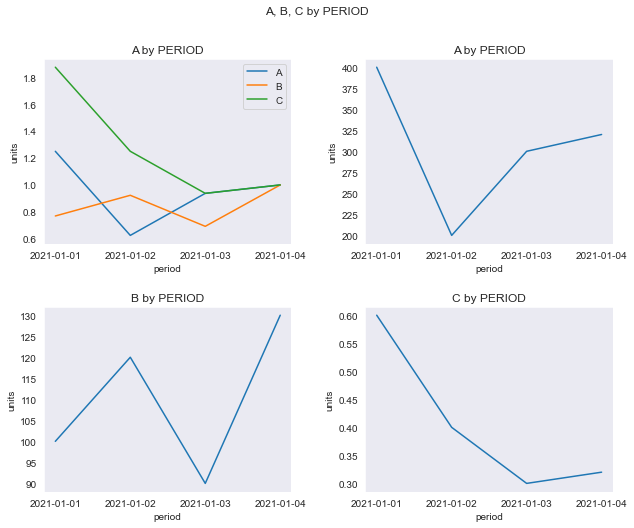

In [96]:
plt.figure(figsize = (10,8))

# indexed data first plot
df_plot = sample_data()
df_plot = df_plot.sort_index(ascending=False) # sort by descending order
df_plot = df_plot/df_plot.reset_index().drop('PERIOD', axis=1).iloc[0,:]
df_plot = df_plot.sort_index()
# df_plot

# actual data other plots
plt.subplot(2,2,1)
_ = plt.plot(df_plot)
_ = plt.title('A by PERIOD')
_ = plt.xlabel('period')
_ = plt.ylabel('units')
_ = plt.legend(df_plot.columns)


df_plot = sample_data()

plt.subplot(2,2,2)
_ = plt.plot(df_plot['A'])
_ = plt.title('A by PERIOD')
_ = plt.xlabel('period')
_ = plt.ylabel('units')

plt.subplot(2,2,3)
_ = plt.plot(df_plot['B'])
_ = plt.title('B by PERIOD')
_ = plt.xlabel('period')
_ = plt.ylabel('units')

plt.subplot(2,2,4)
_ = plt.plot(df_plot['C'])
_ = plt.title('C by PERIOD')
_ = plt.xlabel('period')
_ = plt.ylabel('units')

# plt.tight_layout()
plt.tight_layout(pad=5, w_pad=2, h_pad=2)
plt.suptitle('A, B, C by PERIOD')
plt.show()

## use fig, ax1-4 convention

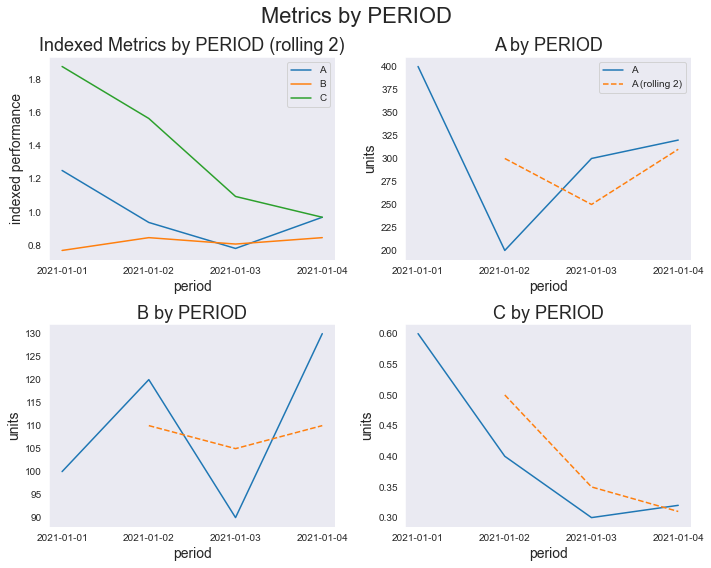

In [131]:
axis_fontsize = 14
title_fontsize = 18
suptitle_fontsize = 22
############################################################################################################################################
############################################################################################################################################

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,8))

############################################################################################################################################
############################################################################################################################################

# indexed data first plot
df_plot = sample_data()
df_plot = df_plot.sort_index(ascending=False) # sort by descending order
df_plot = df_plot/df_plot.reset_index().drop('PERIOD', axis=1).iloc[0,:]
df_plot = df_plot.sort_index()
# df_plot

# actual data other plots
_ = ax1.plot(df_plot.rolling(2,1).mean())
# _ = ax1.title('A by PERIOD')
_ = ax1.set_title('Indexed Metrics by PERIOD (rolling 2)', fontsize =title_fontsize) # subplots use set title
# _ = ax1.xlabel('period')
# _ = ax1.ylabel('units')
_ = ax1.set_xlabel('period', fontsize = axis_fontsize) # subplots use set xlabel
_ = ax1.set_ylabel('indexed performance', fontsize = axis_fontsize) # subplots use set ylabel
_ = ax1.legend(df_plot.columns)

############################################################################################################################################
############################################################################################################################################

df_plot = sample_data()
############################################################################################################################################
############################################################################################################################################
_ = ax2.plot(df_plot['A'])
_ = ax2.plot(df_plot['A'].rolling(2,2).mean(), linestyle = '--')
_ = ax2.set_title('A by PERIOD', fontsize =title_fontsize) # subplots use set title
_ = ax2.set_xlabel('period', fontsize = axis_fontsize) # subplots use set xlabel
_ = ax2.set_ylabel('units', fontsize = axis_fontsize) # subplots use set ylabel
_ = ax2.legend(['A', 'A (rolling 2)'])

############################################################################################################################################
############################################################################################################################################
_ = ax3.plot(df_plot['B'])
_ = ax3.plot(df_plot['B'].rolling(2,2).mean(), linestyle = '--')
_ = ax3.set_title('B by PERIOD', fontsize =title_fontsize) # subplots use set title
_ = ax3.set_xlabel('period', fontsize = axis_fontsize) # subplots use set xlabel
_ = ax3.set_ylabel('units', fontsize = axis_fontsize) # subplots use set ylabel

############################################################################################################################################
############################################################################################################################################
_ = ax4.plot(df_plot['C'])
_ = ax4.plot(df_plot['C'].rolling(2,2).mean(), linestyle = '--')
_ = ax4.set_title('C by PERIOD', fontsize =title_fontsize) # subplots use set title
_ = ax4.set_xlabel('period', fontsize = axis_fontsize) # subplots use set xlabel
_ = ax4.set_ylabel('units', fontsize = axis_fontsize) # subplots use set ylabel

############################################################################################################################################
############################################################################################################################################


_ = fig.suptitle('Metrics by PERIOD', fontsize= suptitle_fontsize)
_ = fig.tight_layout()
############################################################################################################################################
############################################################################################################################################


## use plt.subplot() syntax

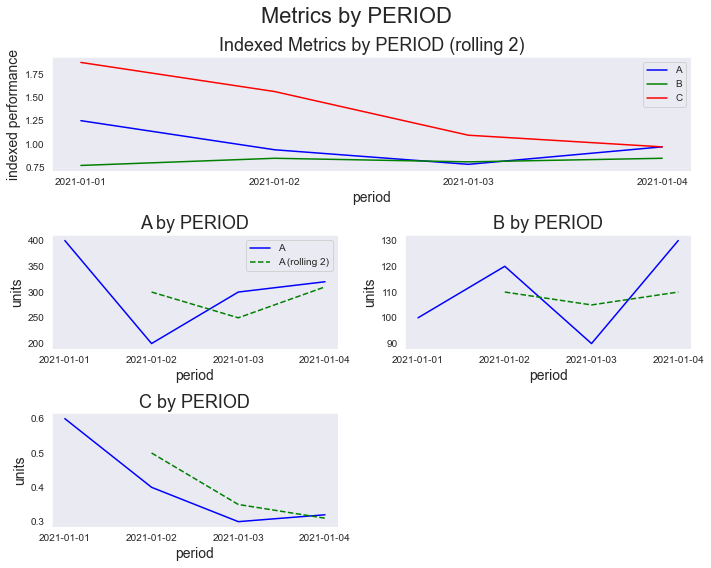

In [16]:
axis_fontsize = 14
title_fontsize = 18
suptitle_fontsize = 22
############################################################################################################################################
############################################################################################################################################
plt.close('all')
fig = plt.figure(figsize=(10,8))

# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (10,8))
ax1 = plt.subplot(311)
ax2 = plt.subplot(323)
ax3 = plt.subplot(324)
ax4 = plt.subplot(325)
############################################################################################################################################
############################################################################################################################################

# indexed data first plot
df_plot = sample_data()
df_plot = df_plot.sort_index(ascending=False) # sort by descending order
df_plot = df_plot/df_plot.reset_index().drop('PERIOD', axis=1).iloc[0,:]
df_plot = df_plot.sort_index()
# df_plot

# actual data other plots
_ = ax1.plot(df_plot.rolling(2,1).mean())
# _ = ax1.title('A by PERIOD')
_ = ax1.set_title('Indexed Metrics by PERIOD (rolling 2)', fontsize =title_fontsize) # subplots use set title
# _ = ax1.xlabel('period')
# _ = ax1.ylabel('units')
_ = ax1.set_xlabel('period', fontsize = axis_fontsize) # subplots use set xlabel
_ = ax1.set_ylabel('indexed performance', fontsize = axis_fontsize) # subplots use set ylabel

# rotate x axis labels
_ = ax1.tick_params(axis='x', rotation=0)

_ = ax1.legend(df_plot.columns)

############################################################################################################################################
############################################################################################################################################

df_plot = sample_data()
############################################################################################################################################
############################################################################################################################################
_ = ax2.plot(df_plot['A'])
_ = ax2.plot(df_plot['A'].rolling(2,2).mean(), linestyle = '--')
_ = ax2.set_title('A by PERIOD', fontsize =title_fontsize) # subplots use set title
_ = ax2.set_xlabel('period', fontsize = axis_fontsize) # subplots use set xlabel
_ = ax2.set_ylabel('units', fontsize = axis_fontsize) # subplots use set ylabel
_ = ax2.legend(['A', 'A (rolling 2)'])

############################################################################################################################################
############################################################################################################################################
_ = ax3.plot(df_plot['B'])
_ = ax3.plot(df_plot['B'].rolling(2,2).mean(), linestyle = '--')
_ = ax3.set_title('B by PERIOD', fontsize =title_fontsize) # subplots use set title
_ = ax3.set_xlabel('period', fontsize = axis_fontsize) # subplots use set xlabel
_ = ax3.set_ylabel('units', fontsize = axis_fontsize) # subplots use set ylabel

############################################################################################################################################
############################################################################################################################################
_ = ax4.plot(df_plot['C'])
_ = ax4.plot(df_plot['C'].rolling(2,2).mean(), linestyle = '--')
_ = ax4.set_title('C by PERIOD', fontsize =title_fontsize) # subplots use set title
_ = ax4.set_xlabel('period', fontsize = axis_fontsize) # subplots use set xlabel
_ = ax4.set_ylabel('units', fontsize = axis_fontsize) # subplots use set ylabel

############################################################################################################################################
############################################################################################################################################


_ = fig.suptitle('Metrics by PERIOD', fontsize= suptitle_fontsize)
_ = fig.tight_layout()
############################################################################################################################################
############################################################################################################################################


# Matplotlib colour cycles
refer to: https://stackoverflow.com/questions/9397944/how-to-set-the-default-color-cycle-for-all-subplots-with-matplotlib?noredirect=1&lq=1

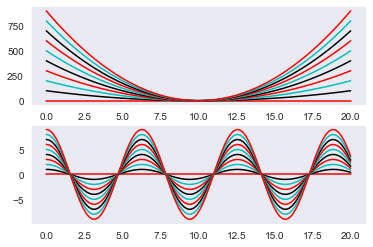

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set the default color cycle
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["r", "k", "c"]) 

x = np.linspace(0, 20, 100)

fig, axes = plt.subplots(nrows=2)

for i in range(10):
    axes[0].plot(x, i * (x - 10)**2)

for i in range(10):
    axes[1].plot(x, i * np.cos(x))

plt.show()

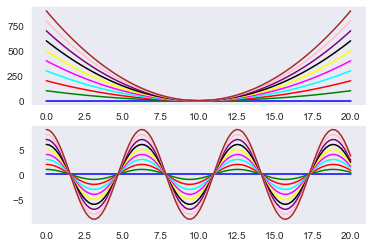

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set the default color cycle
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'pink', 'brown', 'orange', 'teal', 'coral', 'lightblue', 'lime', 'lavender', 'turquoise', 'darkgreen', 'tan', 'salmon', 'gold']) 

x = np.linspace(0, 20, 100)

fig, axes = plt.subplots(nrows=2)

for i in range(10):
    axes[0].plot(x, i * (x - 10)**2)

for i in range(10):
    axes[1].plot(x, i * np.cos(x))

plt.show()